# PARCIAL 3

### PUNTO 4

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

- Construccion Grafo G1 (aleatorio de Erdös-Rényi)

In [25]:
n=10
m=9
seed = 20160 
G1 = nx.gnm_random_graph(n, m, seed=seed)

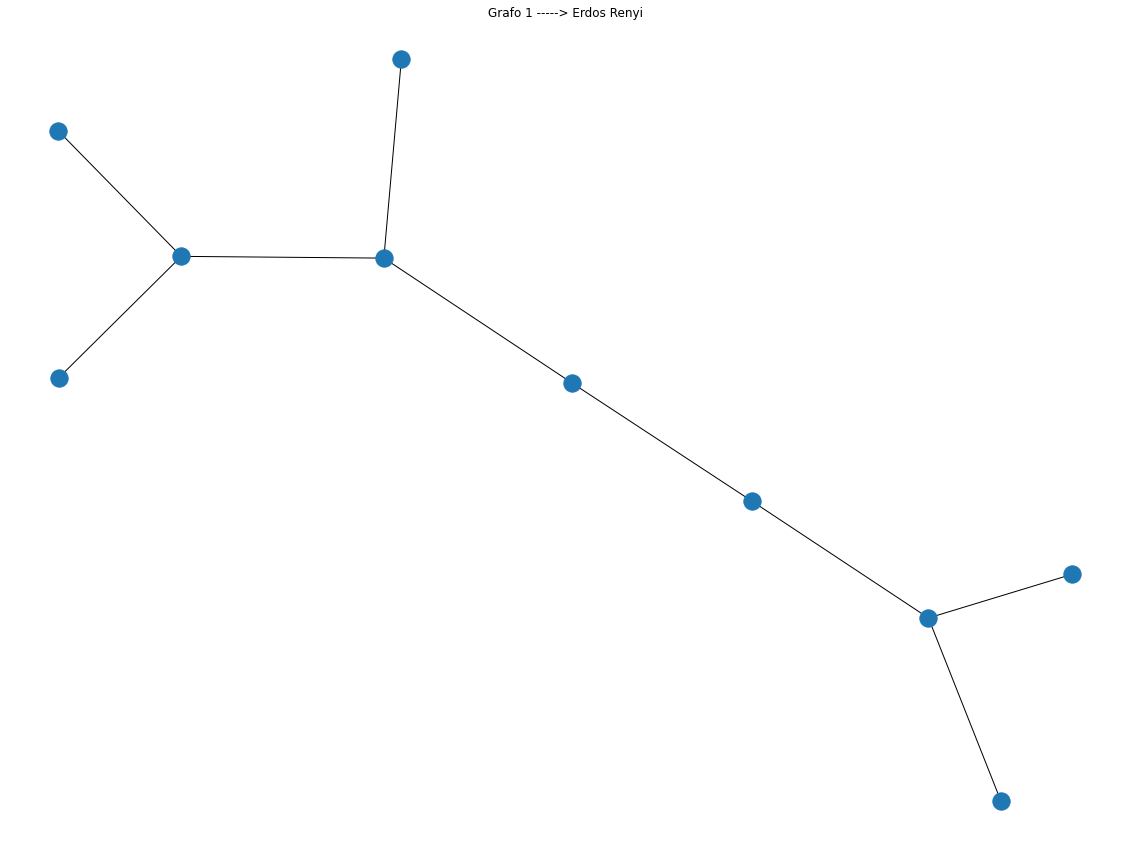

In [26]:
pos = nx.spring_layout(G1, seed=seed)  # Seed for reproducible layout
plt.figure(figsize=(20,15))
plt.title('Grafo 1 -----> Erdos Renyi')
nx.draw(G1, pos=pos)
plt.show()

- Construccion Grafo G2 (ley de potencias en la distribución de los grados)

In [29]:
G2 = nx.barabasi_albert_graph(n,m, seed=seed)

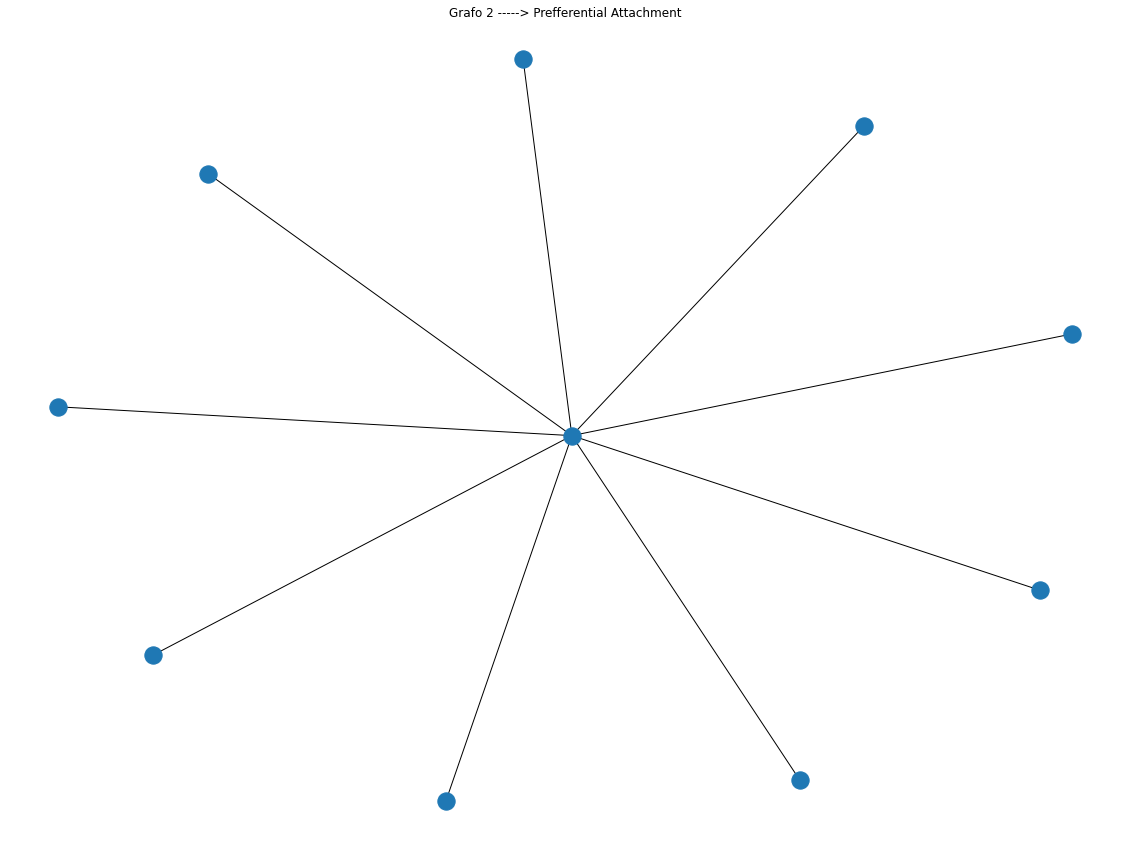

In [30]:
pos = nx.spring_layout(G2, seed=seed)  # Seed for reproducible layout
plt.figure(figsize=(20,15))
plt.title('Grafo 2 -----> Prefferential Attachment')
nx.draw(G2, pos=pos)
plt.show()

### SIMULACION 1

In [34]:
import EoN
gamma = 0.2  
beta = 1.2 
r_0 = beta/gamma
print(r_0)
N = 100 # population size
I0 = 1   # intial n° of infected individuals 
R0 = 0
S0 = N - I0 -R0
pos = nx.spring_layout(G1)
nx_kwargs = {"with_labels":True, "pos": pos, "width": 10, "alpha": 0.7} #optional arguments to be passed on to the
#networkx plotting command.
print("doing Gillespie simulation")
sim = EoN.Gillespie_SIR(G1, tau = beta, gamma=gamma, rho = I0/N, transmission_weight="weight", return_full_data=True)
print("done with simulation, now plotting")
for i in range(0,5,1):
    sim.display(time = i,  **nx_kwargs)
    plt.axis('off') 
    plt.title("Iteration {}".format(i))
    plt.draw()

5.999999999999999
doing Gillespie simulation


ZeroDivisionError: float division by zero

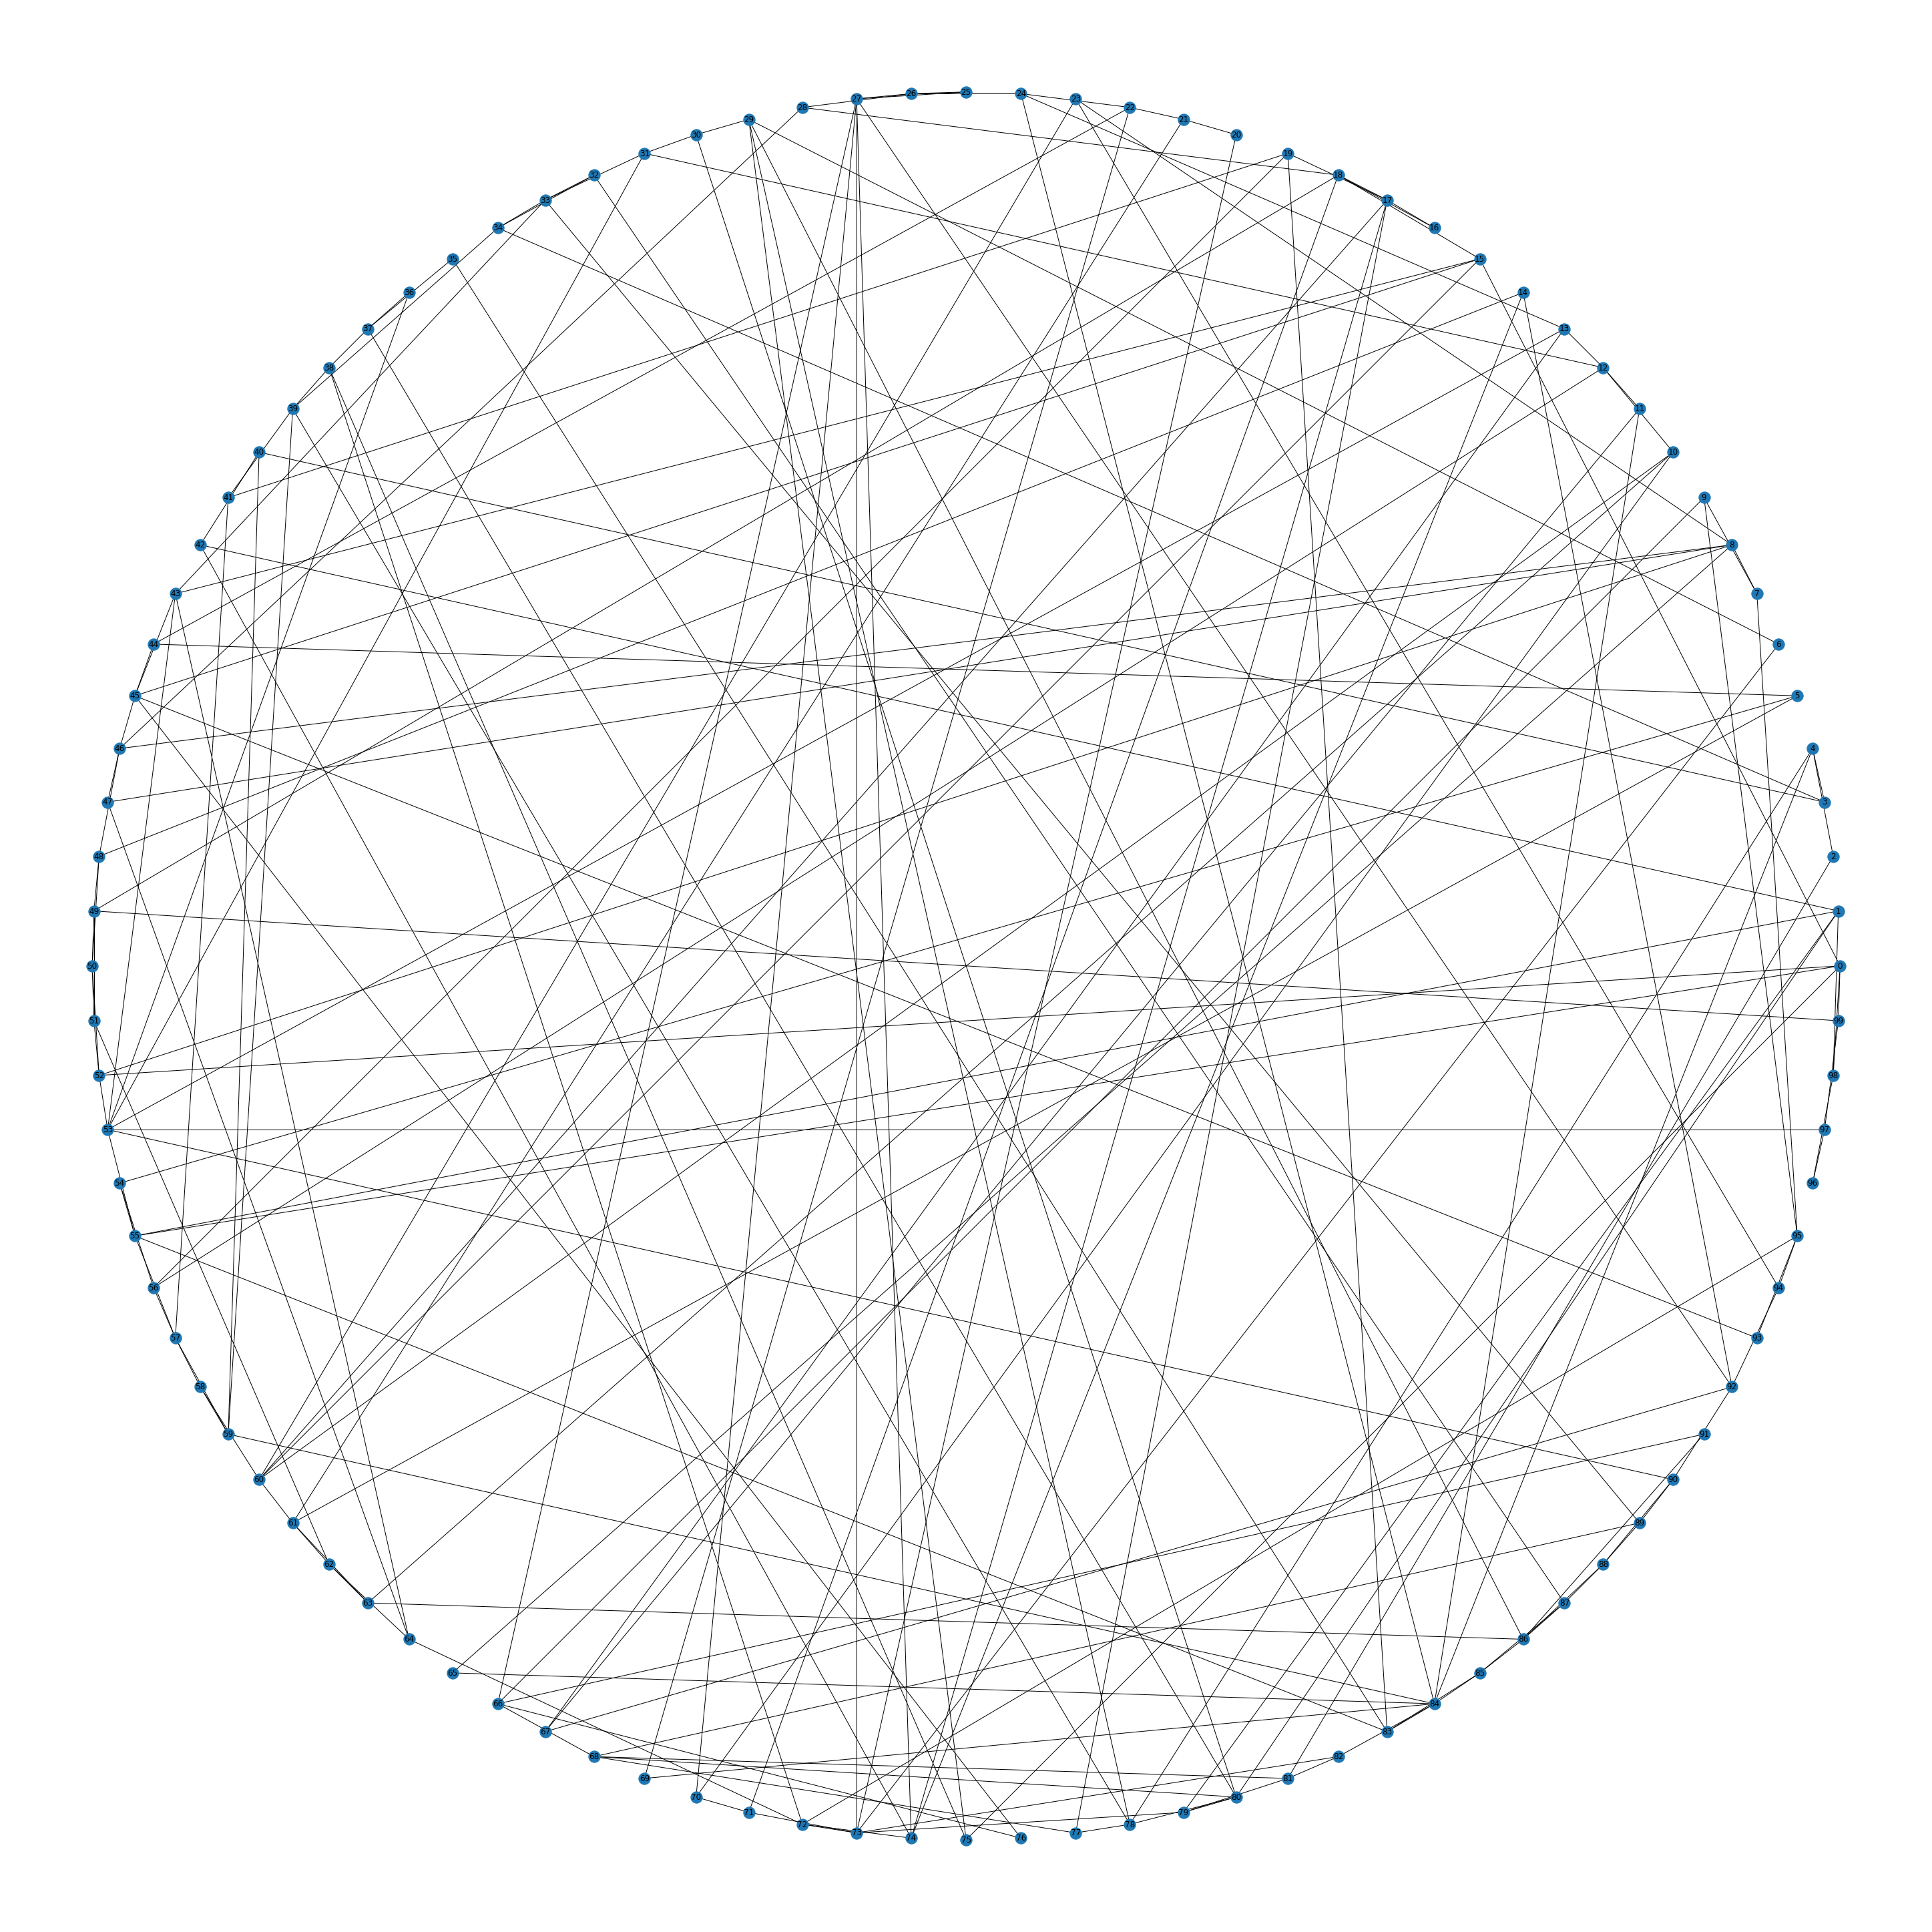

In [35]:
import networkx as nx
g=nx.watts_strogatz_graph(n=100, k=4, p=0.6)
plt.figure(figsize=(40,40))
nx.draw_circular(g, with_labels = True)


(-0.9443599740578759,
 1.0925885701932323,
 -0.688201342882743,
 0.6533358660630976)

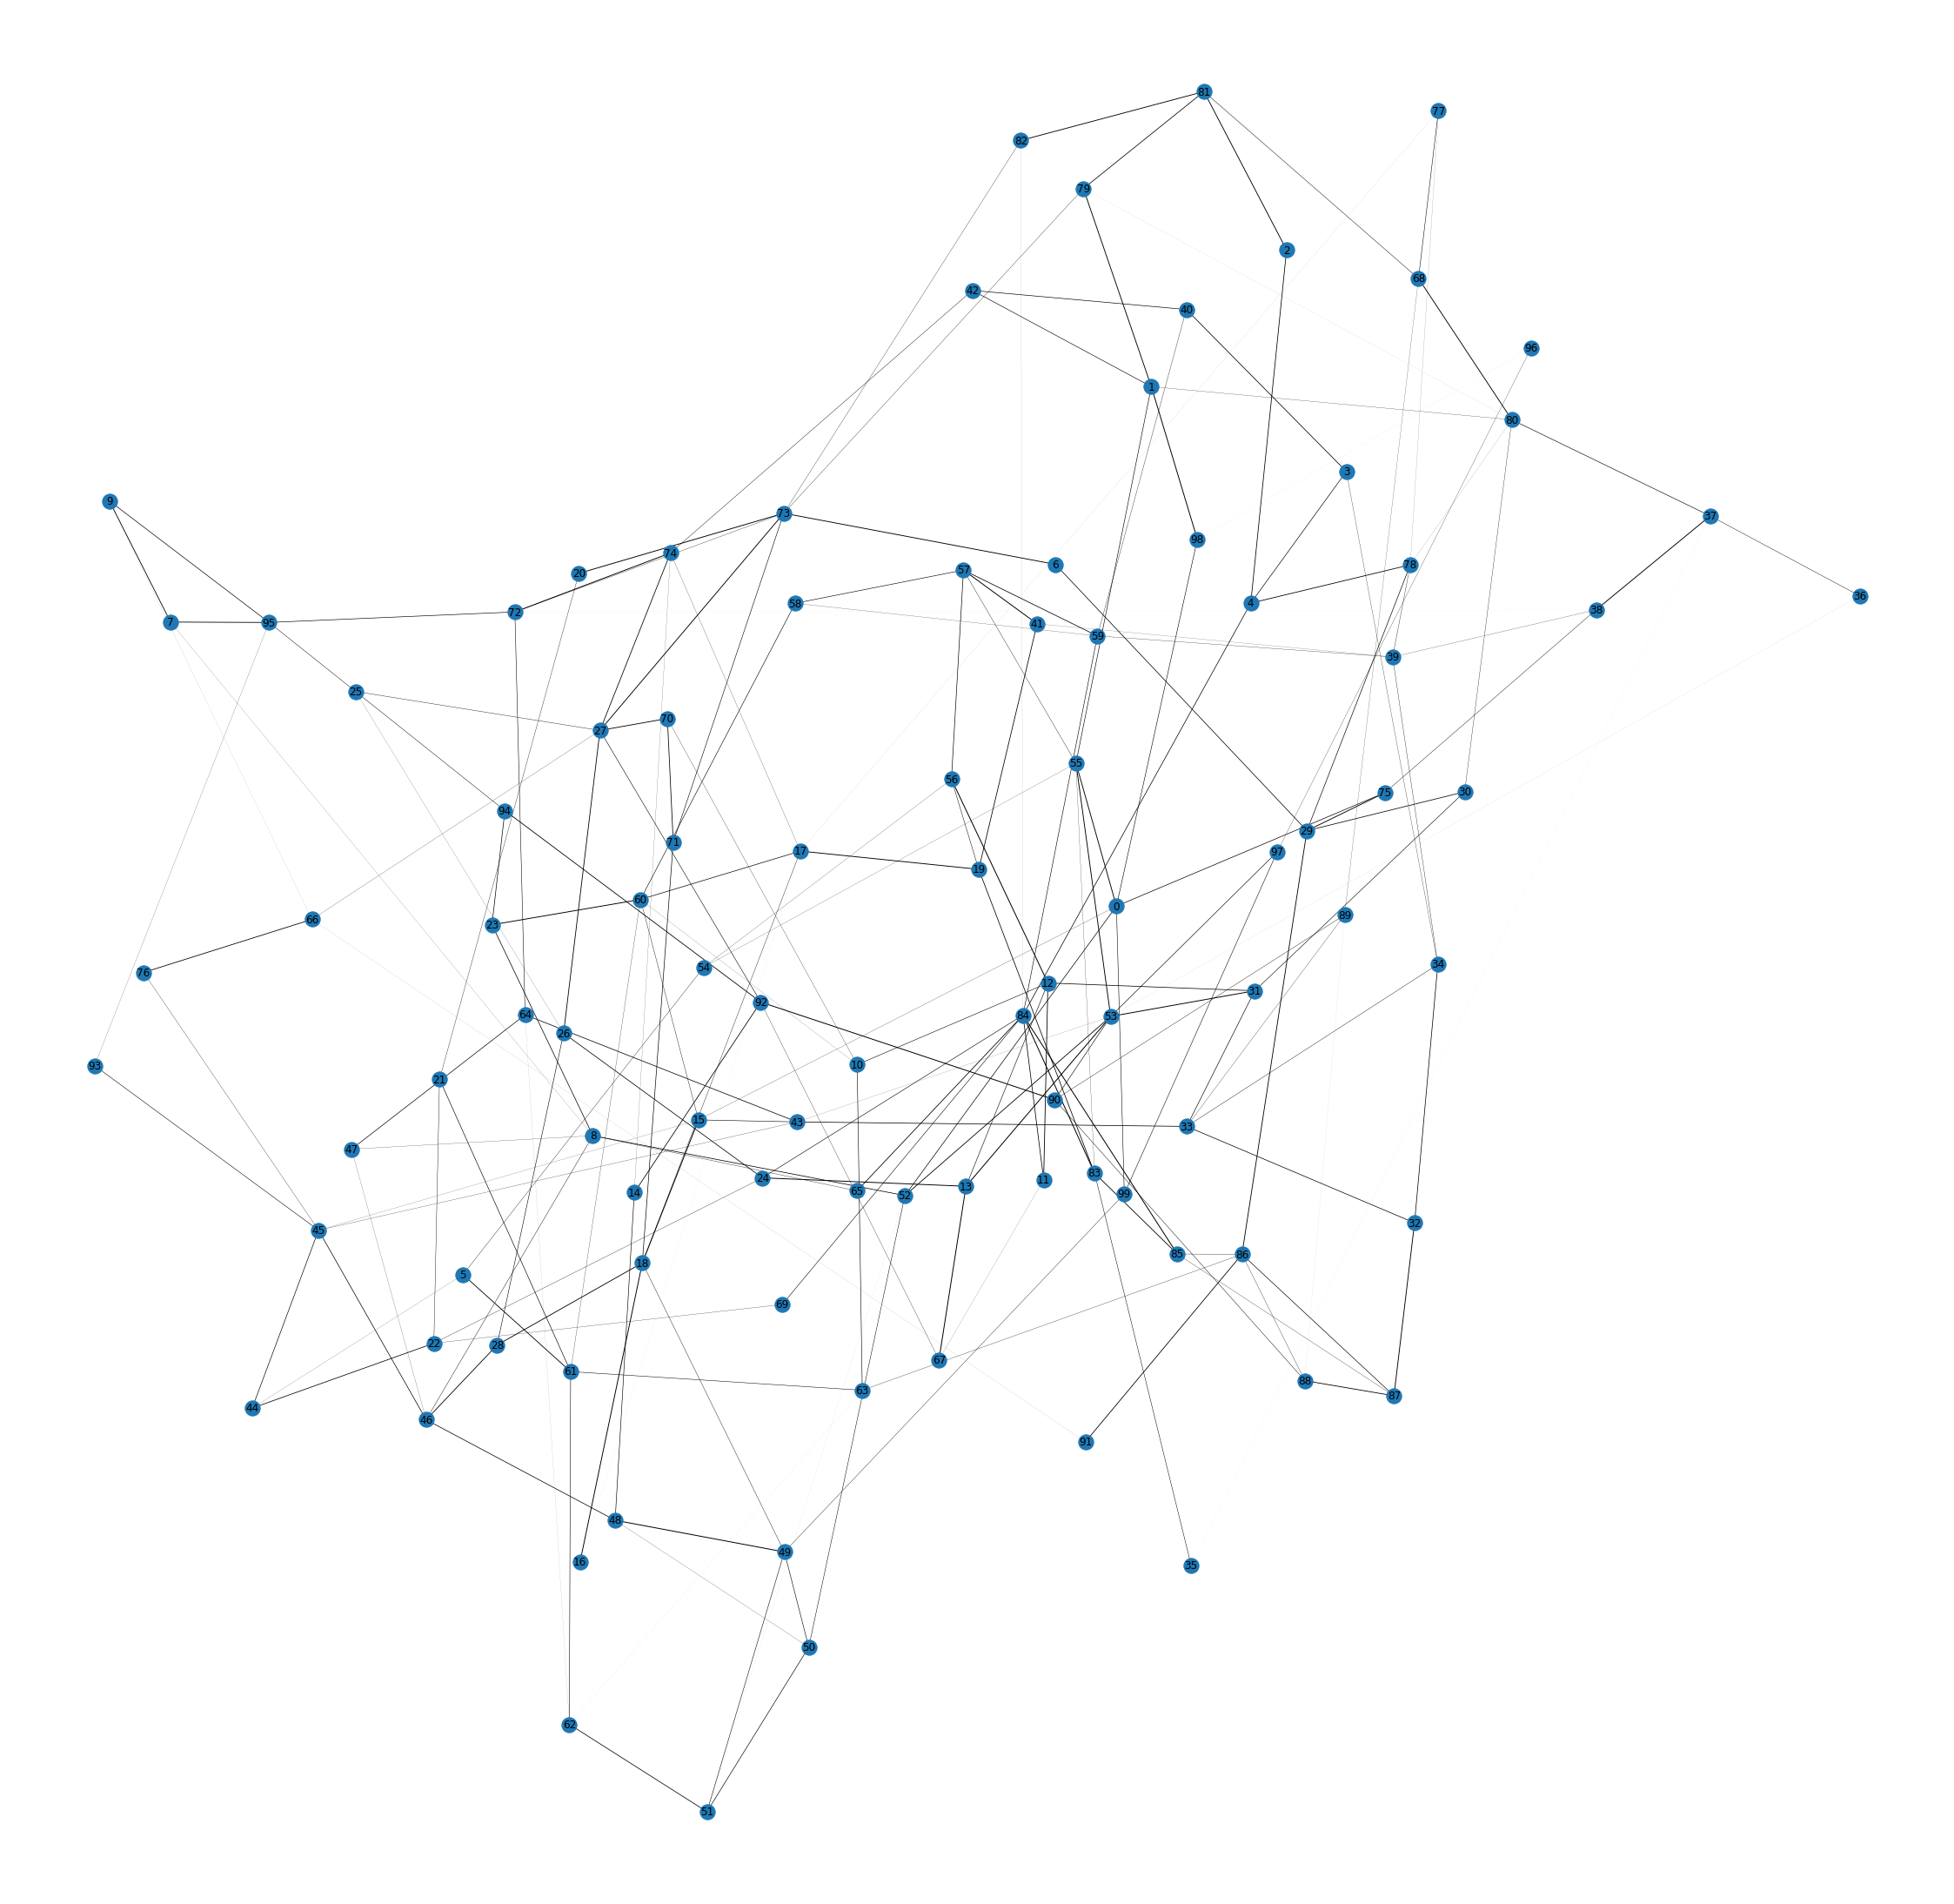

In [36]:
import random
E = g.number_of_edges()
#initializing random weights
w = [random.random() for i in range(E)]
s = max(w)
w = [ i/s for i in w ] #normalizing
len(w)
k = 0
for i, j in g.edges():
    g[i][j]['weight'] = w[k]
    k+=1
import matplotlib.pyplot as plt
edgewidth = [d['weight'] for (u,v,d) in g.edges(data=True)]
# layout
#pos = nx.spring_layout(G, iterations=50)
pos = nx.spring_layout(g)
labels = {}
for i in range(100):
    labels[i] = i
# rendering
plt.figure(figsize=(40,40))
nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos, width=edgewidth, node_size=500)
nx.draw_networkx_labels(g, pos, labels)
plt.axis('off')

5.999999999999999
doing Gillespie simulation
done with simulation, now plotting


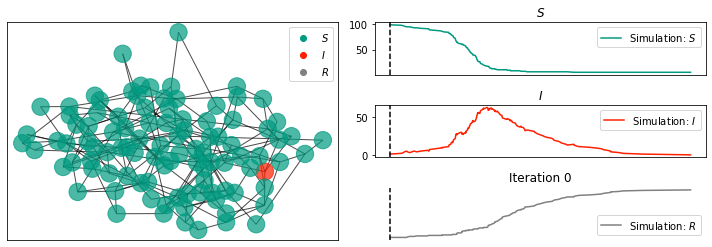

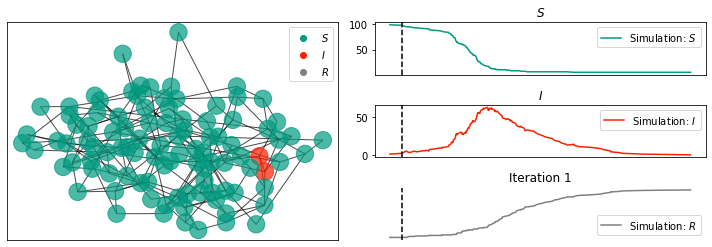

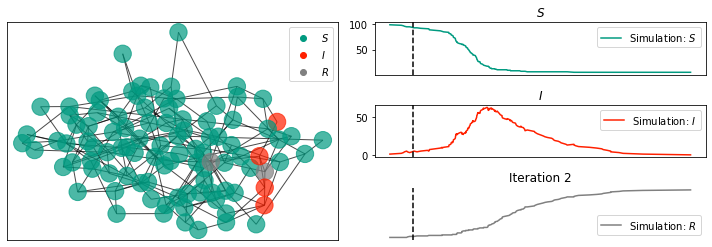

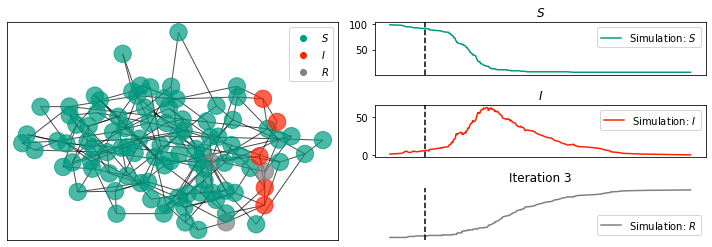

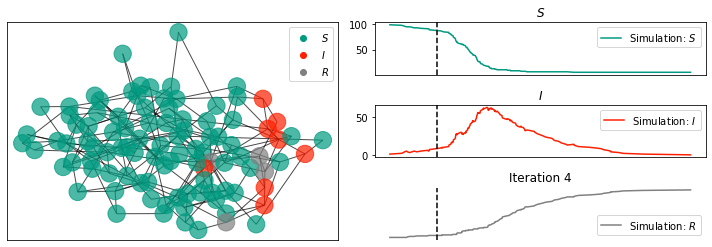

In [40]:
import EoN
gamma = 0.2  
beta = 1.2 
r_0 = beta/gamma
print(r_0)
N = 100 # population size
I0 = 1   # intial n° of infected individuals 
R0 = 0
S0 = N - I0 -R0
pos = nx.spring_layout(g)
nx_kwargs = { "pos": pos, "alpha": 0.7} #optional arguments to be passed on to the
#networkx plotting command.
print("doing Gillespie simulation")
sim = EoN.Gillespie_SIR(g, tau = beta, gamma=gamma, rho = I0/N, transmission_weight="weight", return_full_data=True)
print("done with simulation, now plotting")
for i in range(0,5,1):
    sim.display(time = i,  **nx_kwargs)
    plt.axis('off') 
    plt.title("Iteration {}".format(i))
    plt.draw()

(<AxesSubplot:>,
 [<AxesSubplot:title={'center':'$S$'}>,
  <AxesSubplot:title={'center':'$I$'}>,
  <AxesSubplot:title={'center':'$R$'}, xlabel='$t$'>])

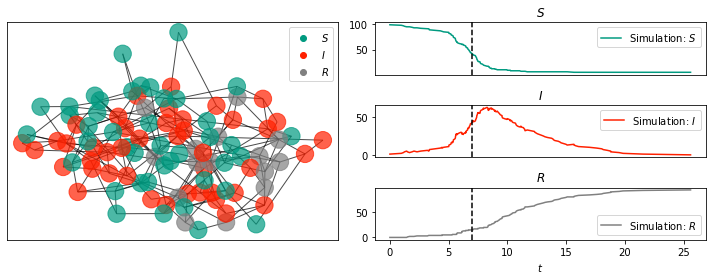

In [41]:
sim.display(time = 7,  **nx_kwargs)



doing Gillespie simulation
done with simulation, now plotting


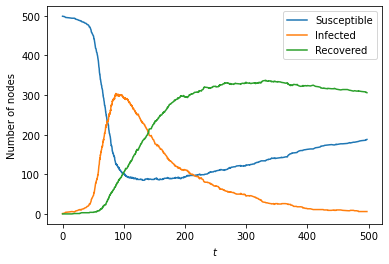

In [42]:
from collections import defaultdict

# parameters required for the SIRS model
a = 0.1
b = 0.01
y = 0.001
d = 0.001

# Simple contagions
# the below is based on an example of a SEIR disease (there is an exposed state before becoming infectious)
# from https://arxiv.org/pdf/2001.02436.pdf

Gnp = nx.gnp_random_graph(500, 0.005)

H = nx.DiGraph() #For the spontaneous transitions
H.add_edge('I', 'R', rate = b)  # an infected node can be recovered/removed
H.add_edge('I', 'S', rate = y)  # an infected node can become susceptible again
H.add_edge('R', 'S', rate = d)  # a recovered node can become suscepticle again

J = nx.DiGraph() #for the induced transitions
J.add_edge(('I', 'S'),('I', 'I'), rate = a)  # a susceptible node can become infected from a neighbour
IC = defaultdict(lambda: 'S')

# set all statuses except one to susceptible. only one node shall begin infected
for node in range(500):
    IC[node] = 'S'
IC[0] = 'I'

return_statuses = ('S', 'I', 'R')
print('doing Gillespie simulation')

t, S, I, R = EoN.Gillespie_simple_contagion(Gnp, H, J, IC, return_statuses, tmax = 500)

print('done with simulation, now plotting')
plt.plot(t, S, label = 'Susceptible')
plt.plot(t, I, label = 'Infected')
plt.plot(t, R, label = 'Recovered')
plt.xlabel('$t$')
plt.ylabel('Number of nodes')
plt.legend()
plt.show()